In [1]:
import pandas as pd
import requests, openpyxl
from bs4 import BeautifulSoup

In [2]:
url= 'https://www.imdb.com/chart/top/'
headers ={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
response=requests.get(url,headers=headers)   




In [3]:
soup=BeautifulSoup(response.content,'html.parser')


In [5]:
movies = soup.find_all('li',attrs='ipc-metadata-list-summary-item sc-1364e729-0 caNpAE cli-parent')

print(len(movies))

250


In [9]:
csv_filename='movies_data.csv'


In [7]:
import csv

In [89]:
with open(csv_filename, mode='w', newline='', encoding='utf-8-sig') as file:
    writer = csv.writer(file)
    header = ['Rank', 'Name', 'Year', 'Rating']
    writer.writerow(header)
    for movie in movies:
        name=movie.find('div', attrs='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-1e00898e-9 jQixeG cli-title').a.text.split('.')[1]
        rank=movie.find('div', attrs='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-1e00898e-9 jQixeG cli-title').a.text.split('.')[0]
        year=movie.find('span',attrs='sc-1e00898e-8 hsHAHC cli-title-metadata-item').text
        rating=movie.find('span',attrs='ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating').span.text
    
        writer.writerow([rank,name,year,rating])
print("Data has been written to the csv file:",csv_filename)
    

Data has been written to the csv file: movies_data.csv


In [90]:
data=pd.read_csv()

In [91]:
data.shape

(250, 4)

In [101]:
data,header

(     Rank                       Name  Year   Rating
 0       1   The Shawshank Redemption  1994   (2.8M)
 1       2              The Godfather  1972     (2M)
 2       3            The Dark Knight  2008   (2.8M)
 3       4     The Godfather: Part II  1974   (1.3M)
 4       5               12 Angry Men  1957   (851K)
 ..    ...                        ...   ...      ...
 245   246                   The Help  2011   (487K)
 246   247      It Happened One Night  1934   (111K)
 247   248              The 400 Blows  1959   (126K)
 248   249            Pather Panchali  1955    (38K)
 249   250         Gangs of Wasseypur  2012   (103K)
 
 [250 rows x 4 columns],
 ['Rank', 'Name', 'Year', 'Rating'])

In [92]:
data.describe()

,Rank,Year
count,250.000000,250.000000
mean,125.500000,1987.332000
std,72.312977,25.637373
min,1.000000,1921.000000
25%,63.250000,1967.250000
50%,125.500000,1995.000000
75%,187.750000,2007.750000
max,250.000000,2023.000000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    250 non-null    int64 
 1   Name    250 non-null    object
 2   Year    250 non-null    int64 
 3   Rating  250 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.9+ KB


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

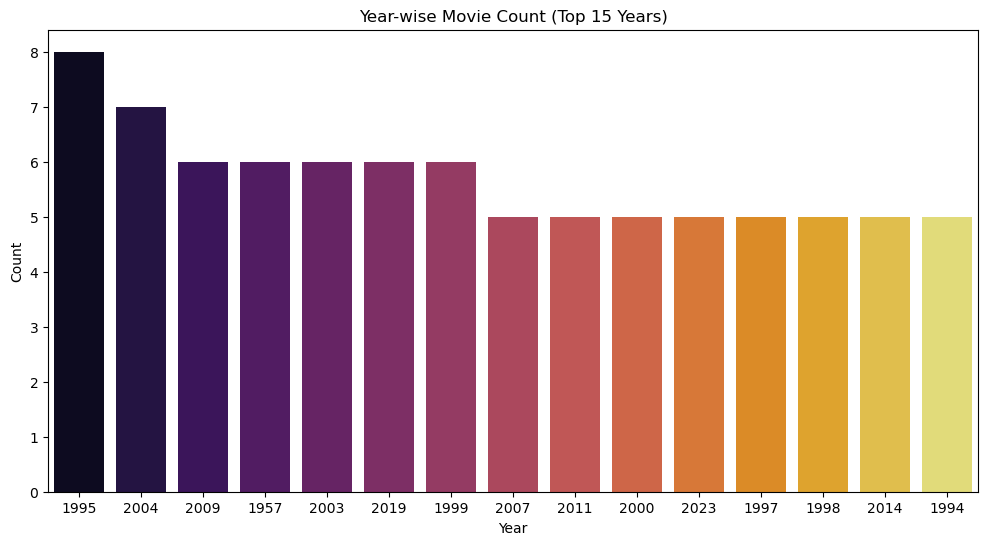

In [113]:
# Ploting: Year-wise Movie Count
top_years = data['Year'].value_counts().head(15).index.tolist()
plt.figure(figsize=(12, 6))
sns.countplot(data=data[data['Year'].isin(top_years)], x='Year', palette='inferno', order=top_years)
plt.title('Year-wise Movie Count (Top 15 Years)')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


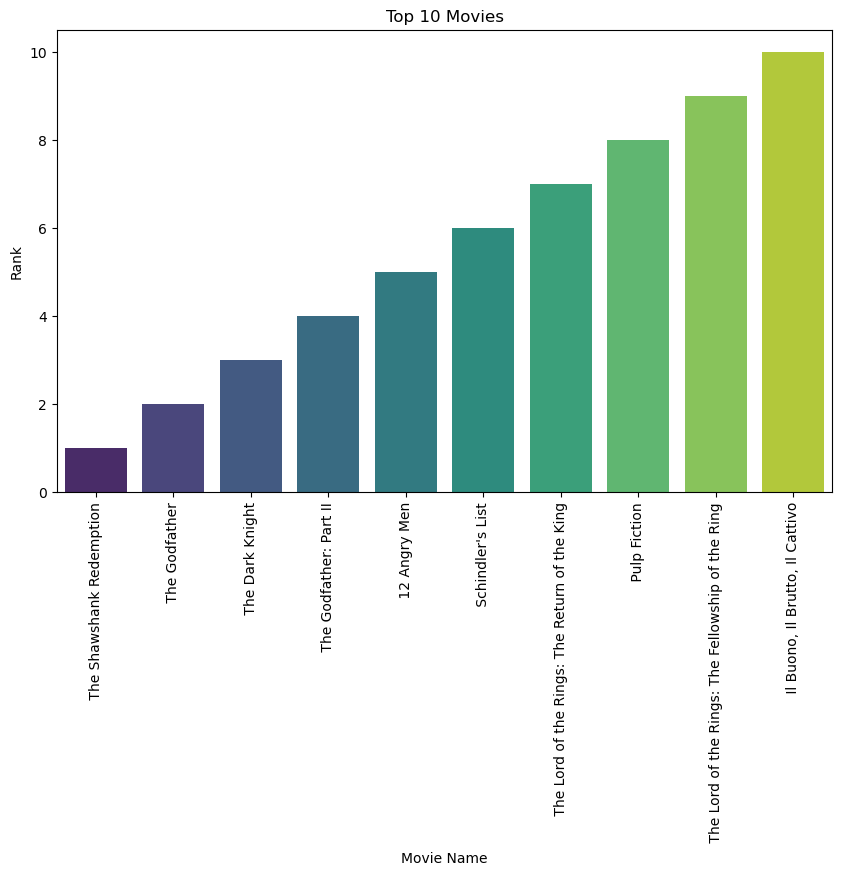

In [111]:
# Ploting: Top 10 Movies
top_10 = data.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Name', y='Rank', palette='viridis')
plt.title('Top 10 Movies')
plt.xlabel('Movie Name')
plt.ylabel('Rank')
plt.xticks(rotation=90)
plt.show()

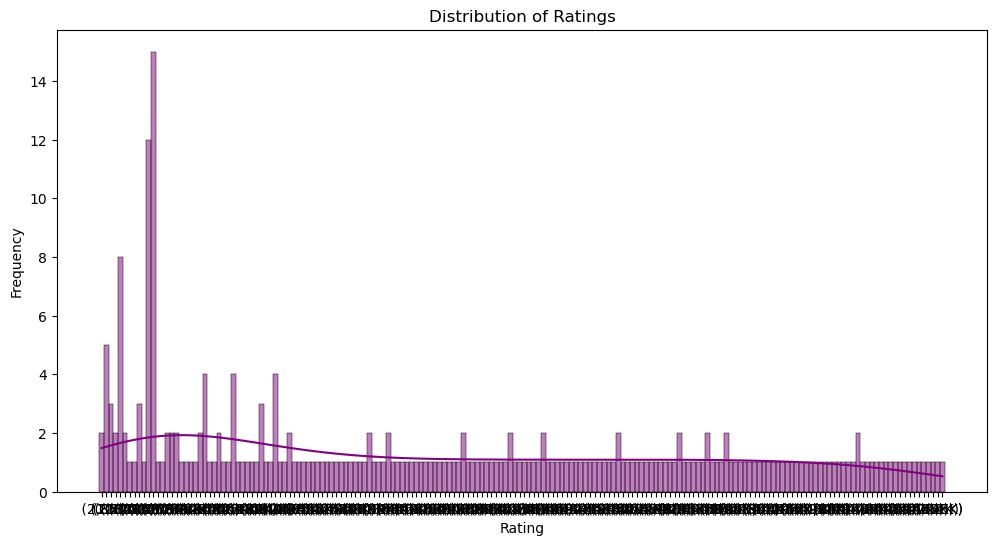

In [119]:
# Ploting: Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Rating', bins=20, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

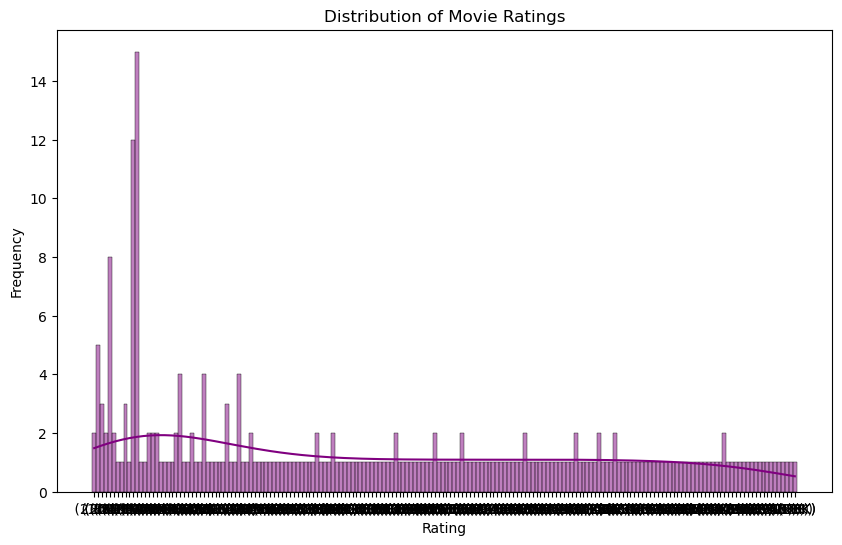

In [118]:
#Rating Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rating', kde=True, color='purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

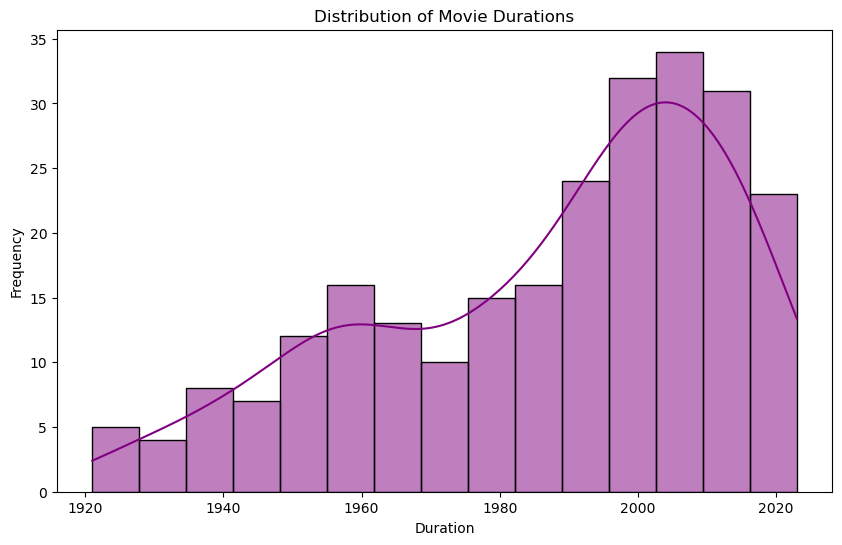

In [120]:
# Movie Durations Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Year'], bins=15, kde=True,color='purple')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


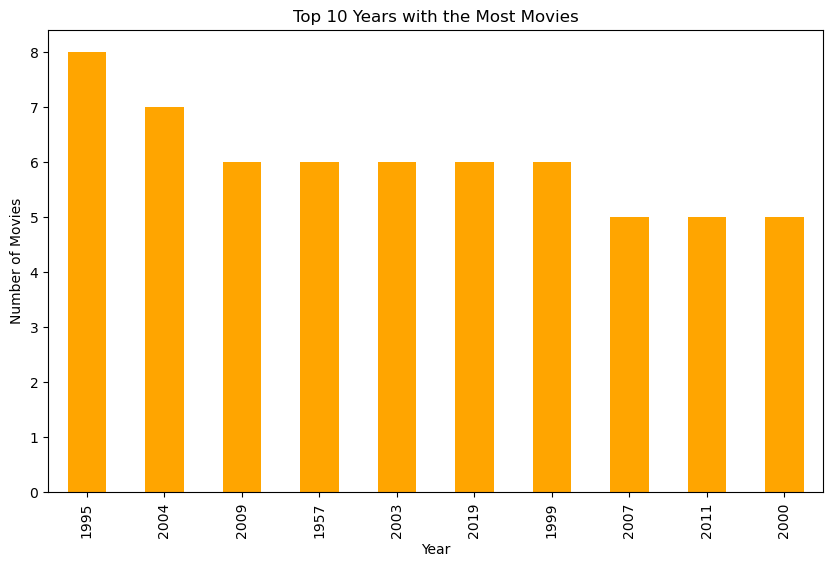

In [122]:
# Plot the top 10 years with the most movies
plt.figure(figsize=(10, 6))
data['Year'].value_counts().head(10).plot(kind='bar',color='orange')
plt.title('Top 10 Years with the Most Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


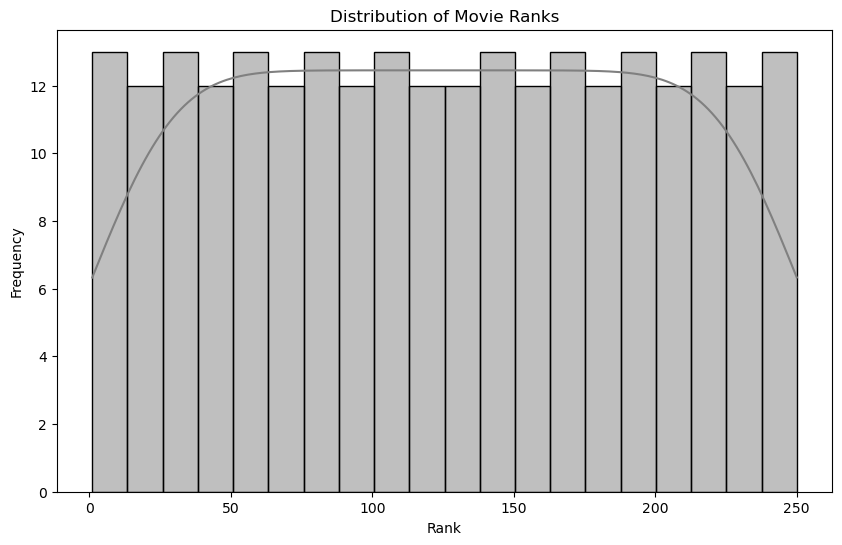

In [127]:
# Plot the distribution of movie ranks
plt.figure(figsize=(10, 6))
sns.histplot(data['Rank'], bins=20, kde=True, color='grey')
plt.title('Distribution of Movie Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()